### Load libraries



In [181]:
import numpy as np
from __future__ import absolute_import
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn import linear_model

# fix random seed for reproducibility
np.random.seed(5)

import matplotlib.pyplot as plt
%matplotlib inline

### Read data

In [182]:
df = pd.read_csv('Data.csv', sep=';', header=0, encoding='utf-16le')
df.columns = ['Reason','Gender','Age','Mobility','Distance','Participation']


### Converting string columns (Reason, Gender, Mobility) to machine readable data
#### and
### Converting Finnish numbers to US English

In [183]:
import math

reason_int = 1
#replacing nan with x
df.Reason = df.Reason.fillna(value='x')
for r in df.Reason.unique():
    print("{} representing {}".format(reason_int, r))
    df.loc[df.Reason == r, 'Reason'] = reason_int
    reason_int +=1

df.Gender = df.Gender.map({'F': 1, 'M': 0})
df.Mobility = df.Mobility.map({'Car': 1, 'No car': 0})

#Convert comma formated number in Age column
df.Age = df.Age.str.replace(',','.')
df.Age = df.Age.astype("float")

#Convert comma formated number in Distance column
df.Distance = df.Distance.str.replace(',','.')
df.Distance = df.Distance.astype("float")


1 representing Hospital readmission
2 representing Other obligations
3 representing Resumed work
4 representing Medical reasons
5 representing Own facilities
6 representing Lost interest
7 representing Disliked therapist
8 representing Forgot
9 representing Moved
10 representing Other program
11 representing x


## Data visualization


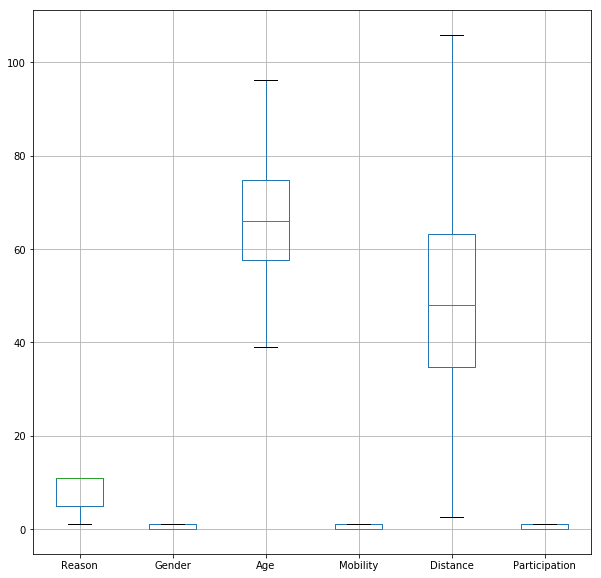

In [184]:
plt.style.use = 'default'
plt.rcParams["figure.figsize"] = (10,10)
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b9315cf98>,
      dtype=object)

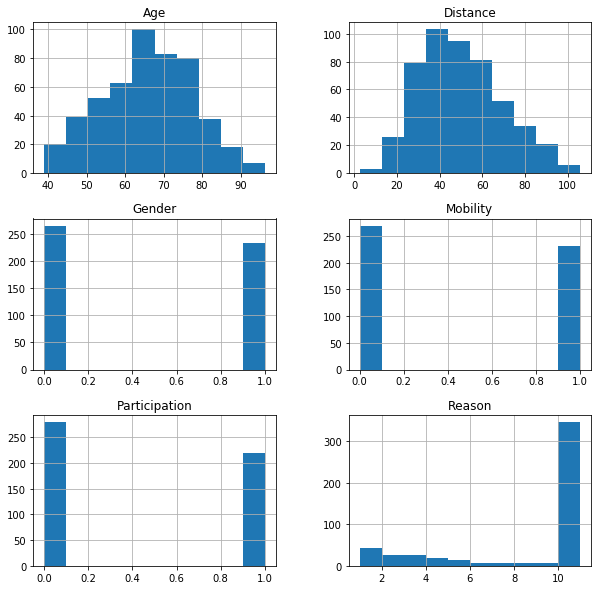

In [185]:
df.hist()

## Logistic Regression
### Split train and test data

- 0.25 test size and 0.75 train size

In [186]:
data = df.values
x_train, x_test, y_train, y_test = train_test_split(data[:,0:5], data[:,5], test_size=0.25)

### Create a model

In [187]:
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Coefficients 

In [188]:
print(model.coef_)


[[ 0.01967786 -0.00487903 -0.01911504  2.14643736 -0.057176  ]]


#### Mean square error

In [190]:
print(np.mean((model.predict(x_test)-y_test)**2))


0.224


#### Variance score

In [191]:
model.score(x_test, y_test)

0.776

### Plot real vs predicted values for test data

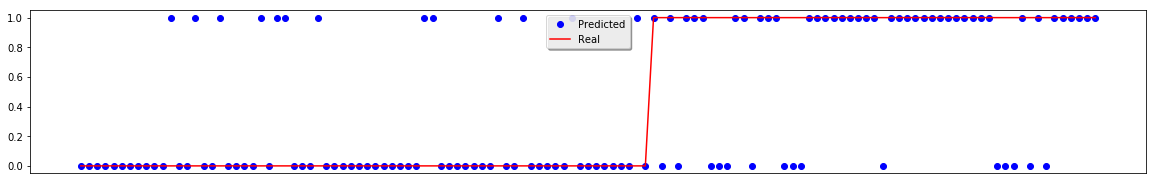

In [192]:
predictions  = model.predict(x_test)
df_a = pd.DataFrame(data=np.column_stack((predictions,y_test)),columns=['predict','real'])
df_a = df_a.sort_values(by=['real'])
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off',
    labelbottom='off')
ax.plot(np.arange(df_a['predict'].count()), df_a["predict"].values, "bo", label='Predicted')
ax.plot(np.arange(df_a['real'].count()), df_a["real"].values, 'r-', label='Real')
ax.legend(loc='upper center', shadow=True)